In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=69

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1])>>


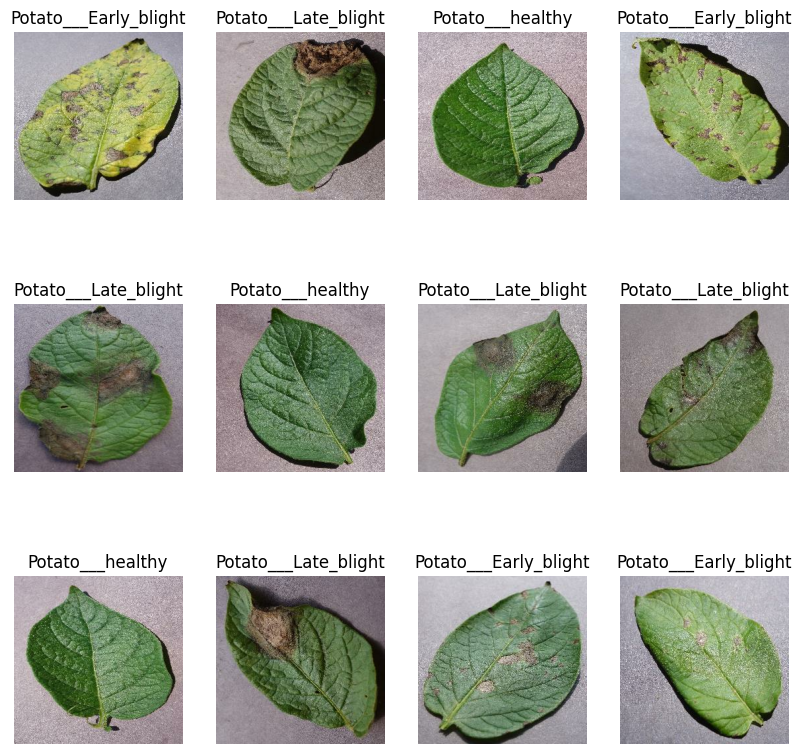

In [5]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy)
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [7]:
train_ds = dataset.take(54)
len(train_ds)

54

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [9]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [10]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+test_split+val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)


54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.7490196  0.7137255  0.7254902 ]
  [0.7372549  0.7019608  0.7137255 ]
  [0.7294118  0.69411767 0.7058824 ]
  ...
  [0.65882355 0.6392157  0.6666667 ]
  [0.6627451  0.6431373  0.67058825]
  [0.6627451  0.6431373  0.67058825]]

 [[0.74509805 0.70980394 0.72156864]
  [0.73333335 0.69803923 0.70980394]
  [0.7254902  0.6901961  0.7019608 ]
  ...
  [0.6666667  0.64705884 0.6745098 ]
  [0.6666667  0.64705884 0.6745098 ]
  [0.6627451  0.6431373  0.67058825]]

 [[0.7490196  0.7137255  0.7254902 ]
  [0.7411765  0.7058824  0.7176471 ]
  [0.73333335 0.69803923 0.70980394]
  ...
  [0.67058825 0.6509804  0.6784314 ]
  [0.65882355 0.6392157  0.6666667 ]
  [0.64705884 0.627451   0.654902  ]]

 ...

 [[0.49803922 0.44313726 0.44313726]
  [0.49019608 0.43529412 0.43529412]
  [0.47843137 0.42352942 0.42352942]
  ...
  [0.54509807 0.5019608  0.5176471 ]
  [0.5137255  0.47058824 0.4862745 ]
  [0.49411765 0.4509804  0.46666667]]

 [[0.5529412  0.49803922 0.49803922]
  [0.5529412  0.49803922 0.49803922]


In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
    
    
])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/69
54/54 [==============================] - 229s 4s/step - loss: 2.2092 - accuracy: 0.5399 - val_loss: 0.7632 - val_accuracy: 0.6875
Epoch 2/69
54/54 [==============================] - 223s 4s/step - loss: 0.5295 - accuracy: 0.7772 - val_loss: 0.4372 - val_accuracy: 0.8385
Epoch 3/69
54/54 [==============================] - 229s 4s/step - loss: 0.3077 - accuracy: 0.8686 - val_loss: 0.7293 - val_accuracy: 0.7135
Epoch 4/69
54/54 [==============================] - 221s 4s/step - loss: 0.2534 - accuracy: 0.9034 - val_loss: 0.2374 - val_accuracy: 0.9167
Epoch 5/69
54/54 [==============================] - 210s 4s/step - loss: 0.1941 - accuracy: 0.9219 - val_loss: 0.1932 - val_accuracy: 0.9271
Epoch 6/69
54/54 [==============================] - 221s 4s/step - loss: 0.2519 - accuracy: 0.9028 - val_loss: 0.2353 - val_accuracy: 0.9010
Epoch 7/69
54/54 [==============================] - 226s 4s/step - loss: 0.1750 - accuracy: 0.9306 - val_loss: 0.4436 - val_accuracy: 0.8438
Epoch 8/69
54

Epoch 59/69
54/54 [==============================] - 163s 3s/step - loss: 0.0419 - accuracy: 0.9850 - val_loss: 0.0408 - val_accuracy: 0.9844
Epoch 60/69
54/54 [==============================] - 164s 3s/step - loss: 0.0466 - accuracy: 0.9826 - val_loss: 0.0475 - val_accuracy: 0.9792
Epoch 61/69
54/54 [==============================] - 161s 3s/step - loss: 0.0484 - accuracy: 0.9826 - val_loss: 0.0267 - val_accuracy: 0.9896
Epoch 62/69
54/54 [==============================] - 159s 3s/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0453 - val_accuracy: 0.9844
Epoch 63/69
54/54 [==============================] - 160s 3s/step - loss: 0.0645 - accuracy: 0.9728 - val_loss: 0.1140 - val_accuracy: 0.9427
Epoch 64/69
54/54 [==============================] - 160s 3s/step - loss: 0.0541 - accuracy: 0.9803 - val_loss: 0.0791 - val_accuracy: 0.9792
Epoch 65/69
54/54 [==============================] - 159s 3s/step - loss: 0.0440 - accuracy: 0.9850 - val_loss: 0.0408 - val_accuracy: 0.9844
Epoch 

In [26]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 835ms/step - loss: 0.0354 - accuracy: 0.9844


In [27]:
scores

[0.035379938781261444, 0.984375]

In [28]:
history.params

{'verbose': 1, 'epochs': 69, 'steps': 54}

In [29]:
history.history['accuracy']

[0.5399305820465088,
 0.7771990895271301,
 0.8686342835426331,
 0.9033564925193787,
 0.921875,
 0.9027777910232544,
 0.9305555820465088,
 0.9108796119689941,
 0.9340277910232544,
 0.9322916865348816,
 0.9467592835426331,
 0.9253472089767456,
 0.9398148059844971,
 0.9496527910232544,
 0.9560185074806213,
 0.9444444179534912,
 0.9646990895271301,
 0.9496527910232544,
 0.9565972089767456,
 0.9542824029922485,
 0.9589120149612427,
 0.9675925970077515,
 0.9363425970077515,
 0.9276620149612427,
 0.9363425970077515,
 0.9641203880310059,
 0.9704861044883728,
 0.9699074029922485,
 0.9716435074806213,
 0.9618055820465088,
 0.9646990895271301,
 0.9606481194496155,
 0.9646990895271301,
 0.9704861044883728,
 0.9722222089767456,
 0.9780092835426331,
 0.9791666865348816,
 0.9791666865348816,
 0.9629629850387573,
 0.9681712985038757,
 0.9710648059844971,
 0.9745370149612427,
 0.9785879850387573,
 0.9739583134651184,
 0.9774305820465088,
 0.9664351940155029,
 0.9756944179534912,
 0.9814814925193787,
 0

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

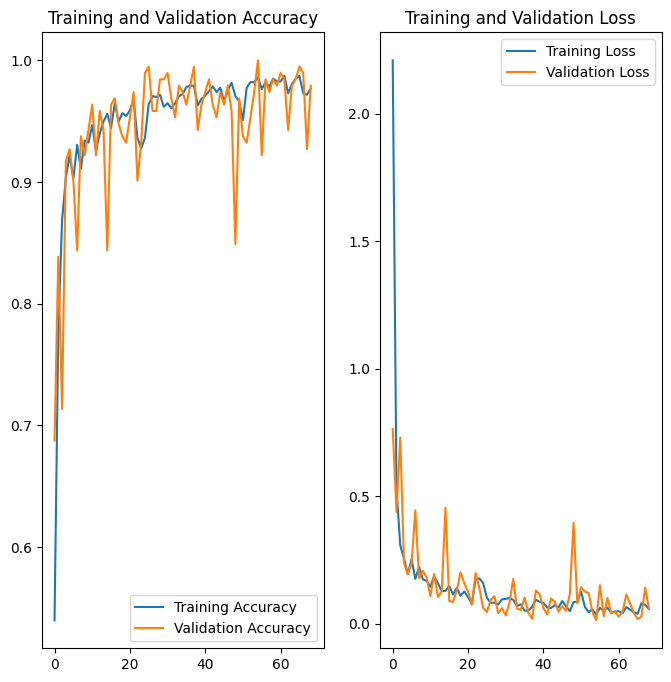

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 689ms/step
predicted label: Potato___Late_blight


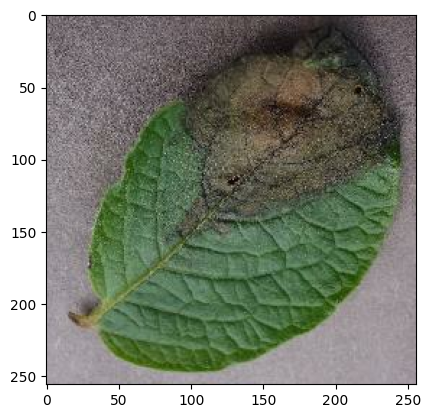

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 76ms/step


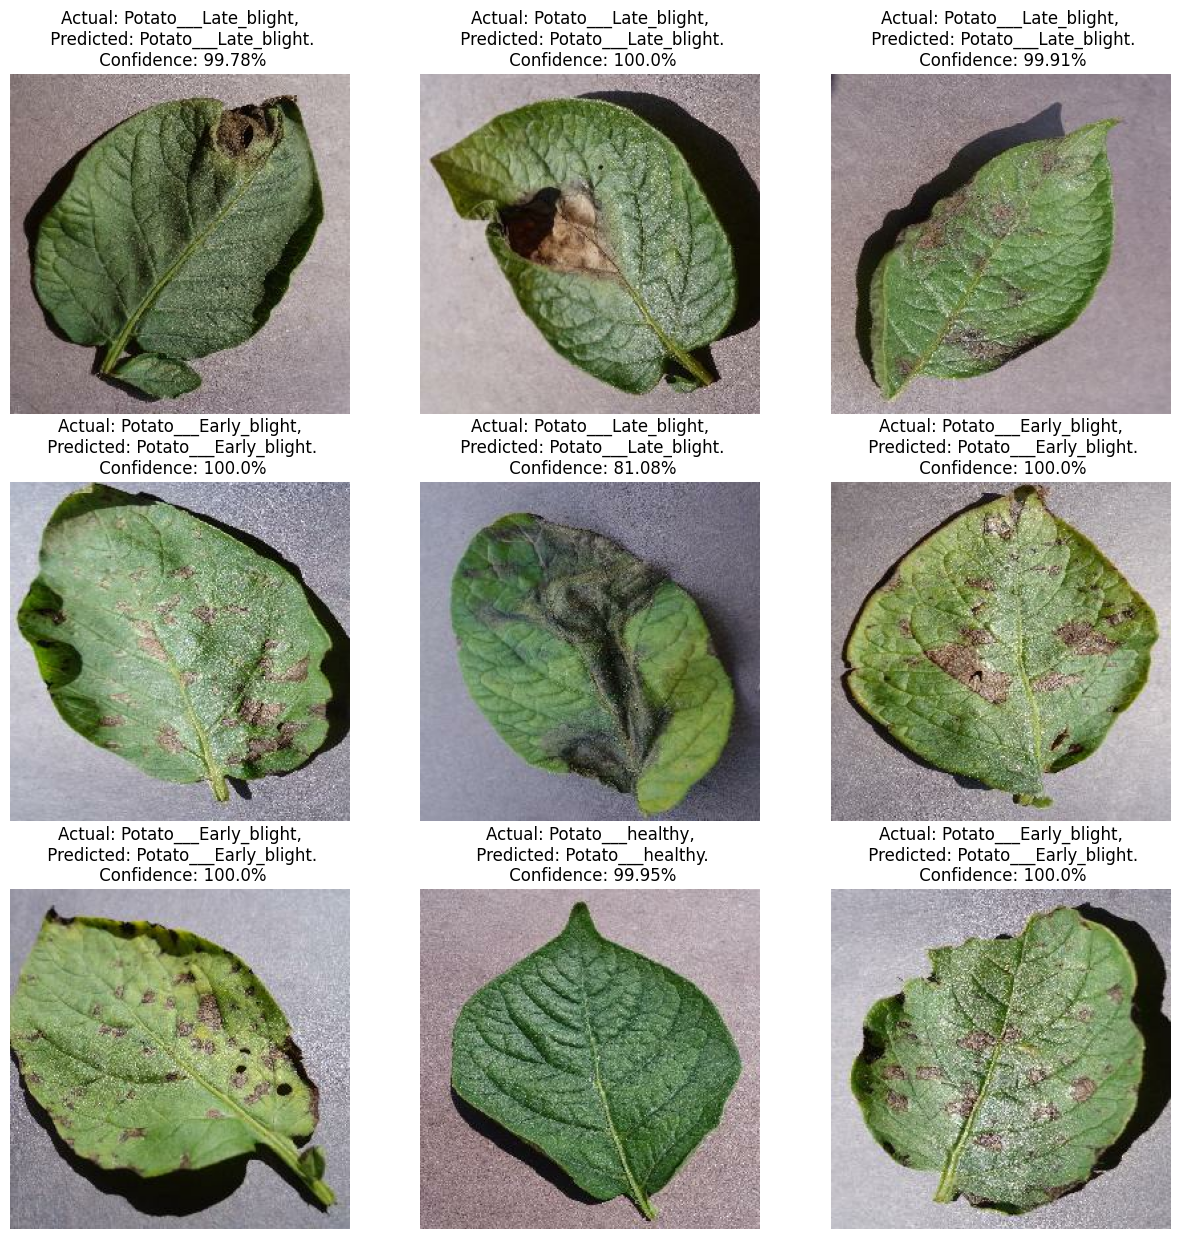

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [40]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [41]:
model.save("../potatoes.h5")

In [43]:
import tensorflow


In [ ]:
from fastapi import FastAPI
app = FastAPI()
@app.get("/hello")
async def hello():
    return "welcome"

In [ ]:
!uvicorn model-training:app --reload

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
async def hello_world():
    return 'Hello, World!'

#if __name__ == "__main__":
app.run(debug=True)


In [44]:
pip install python-multipart


Note: you may need to restart the kernel to use updated packages.


'"C:\Users\KIIT\AppData\Local\Programs\Python\Python311\python.exe"' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


'"C:\Users\KIIT\AppData\Local\Programs\Python\Python311\python.exe"' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install uvicorn


Note: you may need to restart the kernel to use updated packages.
